In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 22974151580975104.0000 - val_loss: 14617883443200.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 7723970199552.0000 - val_loss: 3417093963776.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1805568049152.0000 - val_loss: 798785339392.0000
Epoch 4/20
363/363 [==============================] - 0s 951us/step - loss: 422071828480.0000 - val_loss: 186725318656.0000
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 98664218624.0000 - val_loss: 43649114112.0000
Epoch 6/20
363/363 [==============================] - 0s 980us/step - loss: 23063846912.0000 - val_loss: 10203475968.0000
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 5391437312.0000 - val_loss: 2385182720.0000
Epoch 8/20
363/363 [==============================] - 0s 1000us/step - loss: 1260309632.0000 - val_loss: 557565056.0000
Epoch 9/20
363/363 [===========

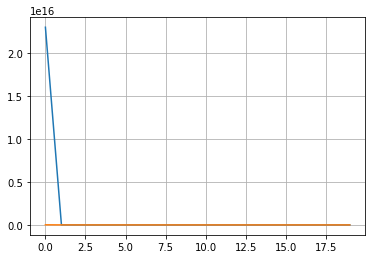

In [7]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape

(11610, 8)


(5160, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train2.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train2, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test2, y_test)
X_new = X_test2[:3]
y_pred = model.predict(X_new)

Epoch 1/20
  1/363 [..............................] - ETA: 1:03 - loss: 5.2366

C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.9197 - val_loss: 166076.8906
Epoch 2/20
363/363 [==============================] - 0s 943us/step - loss: 0.8247 - val_loss: 165876.8750
Epoch 3/20
363/363 [==============================] - 0s 941us/step - loss: 0.6937 - val_loss: 152219.3906
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6350 - val_loss: 165011.0000
Epoch 5/20
363/363 [==============================] - 0s 968us/step - loss: 0.5964 - val_loss: 164365.2344
Epoch 6/20
363/363 [==============================] - 0s 955us/step - loss: 0.5664 - val_loss: 165905.1094
Epoch 7/20
363/363 [==============================] - 0s 923us/step - loss: 0.5420 - val_loss: 156927.8750
Epoch 8/20
363/363 [==============================] - 0s 959us/step - loss: 0.5221 - val_loss: 157237.7031
Epoch 9/20
363/363 [==============================] - 0s 979us/step - loss: 0.5047 - val_loss: 157420.1250
Epoch 10/20
363/363 [==============================]

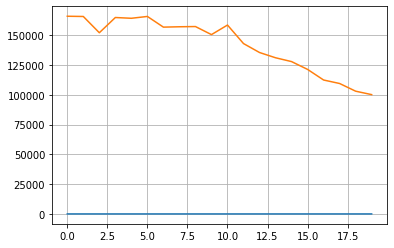

In [10]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

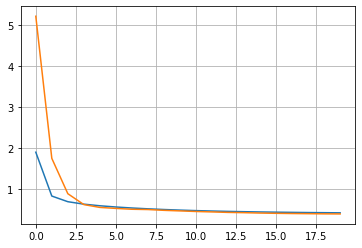

# Dane zawsze muszą być przeskalowane